In [1]:
using LinearAlgebra, Distributions

In [2]:
using Plots 

In [3]:
using PyCall

In [4]:
@pyimport numpy as np

In [54]:
py_list=np.array([[1,2],[3,4]])

2×2 Array{Int64,2}:
 1  2
 3  4

In [12]:
#Juliaの方が書きやすい
[1 2;3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [109]:
#注 endで閉じる
n=10
for i=(n-1):-1:1
    println(i)
end

9
8
7
6
5
4
3
2
1


## β-Hermite ensembles

* http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.308.6290&rep=rep1&type=pdf
<img src="hermite.png" width=50%>

In [14]:
T(n,β)=SymTridiagonal(rand(Normal(0,√(2β)),n),[rand(Chi(i*β)) for i=(n-1):-1:1])

T (generic function with 1 method)

In [15]:
# example：real case(β=1)
T(10,1)

10×10 SymTridiagonal{Float64,Array{Float64,1}}:
 0.134195   3.49016    ⋅         ⋅       …    ⋅          ⋅          ⋅ 
 3.49016   -1.58924   4.83322    ⋅            ⋅          ⋅          ⋅ 
  ⋅         4.83322  -0.559661  3.68035       ⋅          ⋅          ⋅ 
  ⋅          ⋅        3.68035   1.62509       ⋅          ⋅          ⋅ 
  ⋅          ⋅         ⋅        2.23067       ⋅          ⋅          ⋅ 
  ⋅          ⋅         ⋅         ⋅       …    ⋅          ⋅          ⋅ 
  ⋅          ⋅         ⋅         ⋅           2.15739     ⋅          ⋅ 
  ⋅          ⋅         ⋅         ⋅          -1.47398    0.688402    ⋅ 
  ⋅          ⋅         ⋅         ⋅           0.688402  -0.288813   1.91244
  ⋅          ⋅         ⋅         ⋅            ⋅         1.91244   -0.375124

In [51]:
n=5000;β=1;
@time eigen_result=eigen(T(n,β)/√(β*n))
list=eigen_result.values;

  4.805365 seconds (51 allocations: 192.186 MiB)


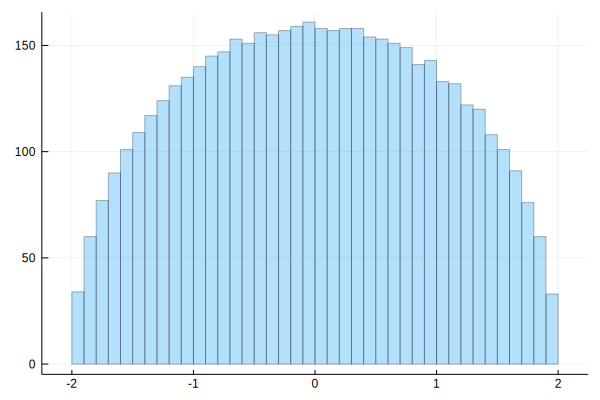

In [52]:
plot(size=(600, 320))
histogram(list,legend=false,norm=false,alpha=0.3,bin=-2:0.1:2)

In [49]:
n = 5000
A = randn(n, n)
@time eigen_result = eigen((A+Transpose(A))/2);
list=eigen_result.values;

 31.498890 seconds (22 allocations: 955.468 MiB, 3.14% gc time)


In [11]:
@which eigen(T(n, β)/√(n*β))

eigen(A::SymTridiagonal{T,V} where V<:AbstractArray{T,1}) where T in LinearAlgebra at /Applications/Julia-1.5.app/Contents/Resources/julia/share/julia/stdlib/v1.5/LinearAlgebra/src/tridiag.jl:280

## β-Laguerre ensembles

<img src="laguerre.png" width=50%>

In [56]:
B(n,m,β)=Bidiagonal([rand(Chi(i*β)) for i=n:-1:(n-m+1)],[rand(Chi(i*β)) for i=m-1:-1:1],:L)

B (generic function with 1 method)

In [58]:
# n*m 
n=9747
m=2000
β=1;
X=B(n,m,β);
X=Array(X);

In [59]:
W=Transpose(X)*X
@time list1=eigen(W).values;

  2.457274 seconds (16 allocations: 92.271 MiB)


In [60]:
# Marchenko-Pastur則(Quater circle Law)のパラメータの設定
ρ=m/n;
σ=1.0;
b=σ*(sqrt(ρ)+1)^2;
a=σ*(1-sqrt(ρ))^2;

<img src="mp-law.png" width=50%>

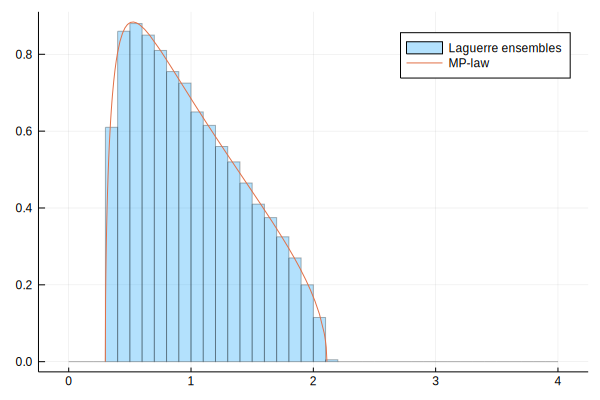

In [63]:
#ゲノム解析のパラメータ n=9747(genes);m=2000(cells) 
histogram(list1/(β*n),norm=true,alpha=0.3,bin=0:0.1:4,lab="Laguerre ensembles")
plot!(x->(1/(2pi*σ*ρ*x))*sqrt((b-x)*(x-a)),a,b,lab="MP-law";)

In [123]:
@time list=svd(X).S;

  5.081107 seconds (13 allocations: 183.350 MiB, 0.42% gc time)


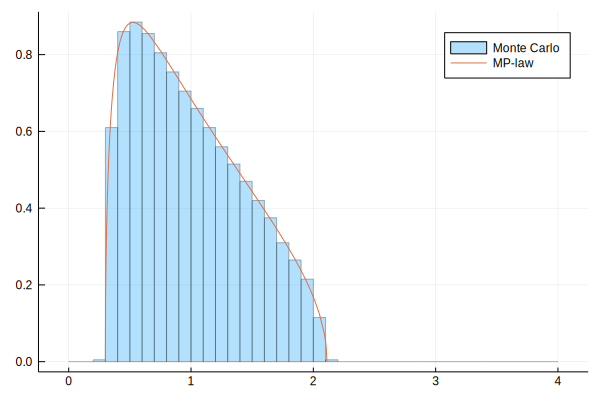

In [126]:
histogram(list.^2/(β*n),norm=true,alpha=0.3,bin=0:0.1:4,lab="Monte Carlo")
plot!(x->(1/(2pi*σ*ρ*x))*sqrt((b-x)*(x-a)),a,b,lab="MP-law";)

## 課題1

In [5]:
list=[]
size=10^6;
β=1;
n=100;
@time for i=1:size
    append!(list,tr(T(n,β)))
end
mean(list)

  8.956619 seconds (9.71 M allocations: 2.667 GiB, 6.68% gc time)


-0.004141441220094594